In [1]:
!pip install plotly

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import warnings
import json
import plotly
import plotly.express as px
from urllib.request import urlopen
import seaborn as sns

In [3]:
complete_df = pd.read_csv('Final/final.csv')
print(complete_df.shape)
complete_df.columns

(2997, 14)


Index(['Count', 'Zipcode', 'Type', 'Owner Occ?', 'Purchase Down %',
       'Purchase Amt', 'Amount Mortgaged', 'Mtg Tx Pd', 'Mansion Tax Pd',
       'New Sales Tax Amount', 'Population', 'Median Age', 'Household Income',
       'Median Gross Rent'],
      dtype='object')

In [4]:
# complete_filtered = pd.DataFrame(complete_df[['Purchase Amt',
#        'Amount Mortgaged', '% Borrowed', 'Mtg Tx Pd',
#        New Sales Tax Amount']])
# filtered_columns = ['Purchase Amt',
#        'Amount Mortgaged', '% Borrowed', 'Mtg Tx Pd',
#        'New Sales Tax Amount']

# # for col in filtered_columns:
# #     print(complete_filtered[col].describe())

In [5]:
#quick filter of data to show that the top 5 mtg amounts show a 
#135% increase over the 6th top mtg amount
complete_df = complete_df.sort_values('Mtg Tx Pd', ascending=False)
complete_df.head()


,Count,Zipcode,Type,Owner Occ?,Purchase Down %,Purchase Amt,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Population,Median Age,Household Income,Median Gross Rent
899,1,11207,CND,0,0.0,30563714,18066352.0,352293.864,305637.14,275073.426,96801.0,35.4,52569.0,1476.0
897,1,11207,CND,0,0.0,5836286,18066352.0,352293.864,58362.86,52526.574,96801.0,35.4,52569.0,1476.0
91,1,11201,SFR,0,40.0,16750000,10050000.0,195975.000,167500.00,150750.000,69755.0,35.1,163310.0,3110.0
126,1,11201,SFR,0,100.0,10800000,7560000.0,147420.000,108000.00,97200.000,69755.0,35.1,163310.0,3110.0
1662,1,11201,SFR,1,31.0,9225000,6400000.0,124800.000,92250.00,409405.500,69755.0,35.1,163310.0,3110.0


In [6]:
complete_df.describe()

,Count,Zipcode,Owner Occ?,Purchase Down %,Purchase Amt,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Population,Median Age,Household Income,Median Gross Rent
count,2997.0,2997.000000,2997.000000,2997.000000,2.997000e+03,2.997000e+03,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000
mean,1.0,11221.890891,0.472139,44.020020,1.214225e+06,6.375541e+05,12307.199369,7827.393230,30534.361356,71584.858859,37.628328,97640.814815,2021.971305
std,0.0,13.261508,0.499306,33.341443,1.175700e+06,7.485164e+05,14638.764523,13841.097031,35348.060226,18264.745179,4.665048,37566.381597,532.018719
min,1.0,11201.000000,0.000000,0.000000,5.600000e+04,0.000000e+00,0.000000,0.000000,784.000000,16808.000000,25.800000,35840.000000,925.000000
25%,1.0,11211.000000,0.000000,20.000000,6.820000e+05,3.000000e+05,5400.000000,0.000000,11340.000000,58047.000000,35.100000,68006.000000,1627.000000
50%,1.0,11222.000000,0.000000,30.000000,9.100000e+05,5.600000e+05,10920.000000,0.000000,20880.000000,72014.000000,37.200000,88546.000000,1732.000000
75%,1.0,11234.000000,1.000000,70.000000,1.350000e+06,8.000000e+05,15600.000000,13500.000000,37723.000000,89976.000000,42.200000,125747.000000,2368.000000
max,1.0,11249.000000,1.000000,100.000000,3.056371e+07,1.806635e+07,352293.864000,305637.140000,763336.000000,108180.000000,49.400000,173899.000000,3110.000000


In [7]:

# for col_name in filtered_columns:
#     quartiles = complete_filtered[col_name].quantile([.25, .5, .75])
#     lowerq= quartiles[0.25]
#     upperq = quartiles[0.75]
#     iqr = upperq - lowerq
#     lower_bound = lowerq - (1.5*iqr)
#     upper_bound = upperq + (1.5* iqr)
#     outliers =complete_filtered[(complete_filtered[col_name] < lower_bound) | (complete_filtered[col_name] > upper_bound)]
#     print(f"{col_name}'s potentional outliers: {outliers}")



In [8]:
# fig, axes = plt.subplots(nrows=len(filtered_columns), ncols=1, figsize=(8, 2 * len(filtered_columns)))


# for i, column in enumerate(filtered_columns):
#     axes[i].boxplot(complete_filtered[column])
#     axes[i].set_title(f'Boxplot: {column}')
#     axes[i].set_ylabel(column)
    
# plt.tight_layout()
# plt.show()

In [9]:
# new_filt = complete_df[[ 'Type', 'Owner Occ?', 'Purchase Amt',
#        'Amount Mortgaged', '% Borrowed', 'Mtg Tx Pd',
#        'New Sales Tax Amount', 'Population', 'Median Age', 'Household Income',
#        'Median Gross Rent']]

# col_to_plot = ['Purchase Amt',
#        'Amount Mortgaged', '% Borrowed', 'Mtg Tx Pd',
#        'New Sales Tax Amount', 'Population', 'Household Income', 'Median Gross Rent']


In [10]:
col_to_plot = []

def plotscat(col_to_plot, df):
    fig, axes = plt.subplots(nrows=len(col_to_plot), ncols=1, figsize=(8, 2 * len(col_to_plot)))
    for i, column in enumerate(col_to_plot):
        axes[i].scatter(df['Household Income'], df[column])
        axes[i].set_title(f'Scatter Plot: Household Income vs {column}')
        axes[i].set_xlabel('Household Income')
        axes[i].set_ylabel(column)
        plt.tight_layout()
        plt.show()

In [11]:
#NEED TO REWRITE THIS - BOOLEAN
complete_df.drop('Type', axis=1, inplace=True)

In [12]:
#create new columns for % borrowed, total taxes paid and taxes as a percent of household income and taxes as a percent of gross rent

#divide monetary amounts by 1000 to make the units per 1000
complete_df['Zip'] = complete_df['Zipcode'].astype(str)
complete_df['Tot tax pd'] = complete_df['Mtg Tx Pd'] + complete_df['Mansion Tax Pd']
complete_df['Mtax as % Household Income'] = complete_df['Mtg Tx Pd']/complete_df['Household Income']* 100
complete_df['Months rent spent on Mtax'] = complete_df['Median Gross Rent']/complete_df['Mtg Tx Pd']
complete_df['New Sales Tax Pd % Household Income'] = complete_df['New Sales Tax Amount']/complete_df['Household Income']*100



In [13]:
# complete_df["Purchase Amt"] = complete_df["Purchase Amt"] / 1000
# complete_df["Amount Mortgaged"] = complete_df["Amount Mortgaged"] / 1000
# complete_df["Mtg Tx Pd"] = complete_df["Mtg Tx Pd"] / 1000
# complete_df["Mansion Tax Pd"] = complete_df["Mansion Tax Pd"] / 1000
# complete_df["New Sales Tax Amount"] = complete_df["New Sales Tax Amount"] / 1000

In [14]:
complete_df.describe()

,Count,Zipcode,Owner Occ?,Purchase Down %,Purchase Amt,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Population,Median Age,Household Income,Median Gross Rent,Tot tax pd,Mtax as % Household Income,Months rent spent on Mtax,New Sales Tax Pd % Household Income
count,2997.0,2997.000000,2997.000000,2997.000000,2.997000e+03,2.997000e+03,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000,2997.000000
mean,1.0,11221.890891,0.472139,44.020020,1.214225e+06,6.375541e+05,12307.199369,7827.393230,30534.361356,71584.858859,37.628328,97640.814815,2021.971305,20134.592599,13.522502,inf,33.854470
std,0.0,13.261508,0.499306,33.341443,1.175700e+06,7.485164e+05,14638.764523,13841.097031,35348.060226,18264.745179,4.665048,37566.381597,532.018719,25359.903939,20.295194,NaN,37.605883
min,1.0,11201.000000,0.000000,0.000000,5.600000e+04,0.000000e+00,0.000000,0.000000,784.000000,16808.000000,25.800000,35840.000000,925.000000,0.000000,0.000000,0.004190,0.617231
25%,1.0,11211.000000,0.000000,20.000000,6.820000e+05,3.000000e+05,5400.000000,0.000000,11340.000000,58047.000000,35.100000,68006.000000,1627.000000,8122.500000,5.984838,0.122337,12.084071
50%,1.0,11222.000000,0.000000,30.000000,9.100000e+05,5.600000e+05,10920.000000,0.000000,20880.000000,72014.000000,37.200000,88546.000000,1732.000000,12655.500000,12.483722,0.170411,22.260274
75%,1.0,11234.000000,1.000000,70.000000,1.350000e+06,8.000000e+05,15600.000000,13500.000000,37723.000000,89976.000000,42.200000,125747.000000,2368.000000,28294.125000,18.232251,0.345621,45.447487
max,1.0,11249.000000,1.000000,100.000000,3.056371e+07,1.806635e+07,352293.864000,305637.140000,763336.000000,108180.000000,49.400000,173899.000000,3110.000000,657931.004000,670.155156,inf,823.589832


In [71]:
tax_revenue = ["Current Mortgage Tax Paid", "Current Mansion Tax Paid", "Surplus Over Old Tax Collected"]
tax = [mtg_sum, mansion_sum, extra_revenue]
colors = ["lightblue","red","yellowgreen"]

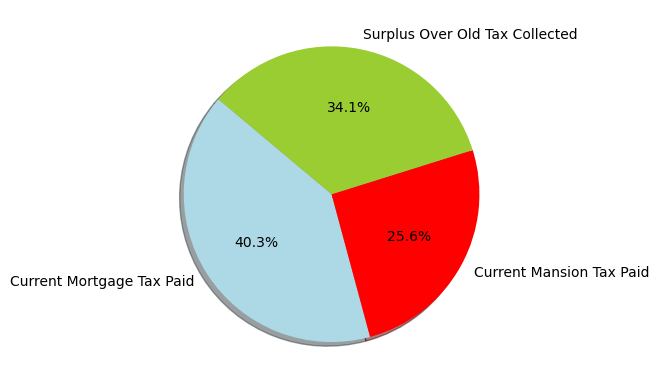

In [72]:
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(tax, labels=tax_revenue, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('New Tax Generated')
# Create axes which are equal so we have a perfect circle
#plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.show()

In [91]:
#Seperate the data into 4 dataframes, by areas and status

bklyn_df = complete_df.loc[~complete_df['Zipcode'].isin([10013, 10007, 10282, 10453, 11355, 10457, 11368])]
bklyn_investors = bklyn_df[(bklyn_df['Owner Occ?'] ==1)]
bklyn_oocc = bklyn_df[(bklyn_df['Owner Occ?'] ==0)]



## Bar Chart (proportion of taxes paid in the old and new system form Occ vs Investors)

In [101]:
bklyn_investors.head()

,Count,Zipcode,Owner Occ?,Purchase Down %,Purchase Amt,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Population,Median Age,Household Income,Median Gross Rent,Zip,Tot tax pd,Mtax as % Household Income,Months rent spent on Mtax,New Sales Tax Pd % Household Income
1763,1,11215,1,20.0,1550000,1240000.0,24180.0,15500.0,68789.00000,72014.0,37.2,173899.0,2673.0,11215,39680.0,13.904623,0.110546,39.556869
1792,1,11215,1,100.0,1700000,0.0,0.0,17000.0,75446.00000,72014.0,37.2,173899.0,2673.0,11215,17000.0,0.000000,inf,43.384953
1791,1,11215,1,59.0,1600000,650000.0,12675.0,16000.0,71008.00000,72014.0,37.2,173899.0,2673.0,11215,28675.0,7.288714,0.210888,40.832897
1720,1,11215,1,25.0,999999,749000.0,14605.5,0.0,44379.95562,72014.0,37.2,173899.0,2673.0,11215,14605.5,8.398841,0.183013,25.520535
1764,1,11215,1,37.0,1215000,765000.0,14917.5,12150.0,53921.70000,72014.0,37.2,173899.0,2673.0,11215,27067.5,8.578255,0.179186,31.007481


In [102]:
bklyn_oocc.head()

,Count,Zipcode,Owner Occ?,Purchase Down %,Purchase Amt,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Population,Median Age,Household Income,Median Gross Rent,Zip,Tot tax pd,Mtax as % Household Income,Months rent spent on Mtax,New Sales Tax Pd % Household Income
899,1,11207,0,0.0,30563714,18066352.0,352293.864,305637.14,275073.426,96801.0,35.4,52569.0,1476.0,11207,657931.004,670.155156,0.004190,523.261668
897,1,11207,0,0.0,5836286,18066352.0,352293.864,58362.86,52526.574,96801.0,35.4,52569.0,1476.0,11207,410656.724,670.155156,0.004190,99.919295
91,1,11201,0,40.0,16750000,10050000.0,195975.000,167500.00,150750.000,69755.0,35.1,163310.0,3110.0,11201,363475.000,120.001837,0.015869,92.309105
126,1,11201,0,100.0,10800000,7560000.0,147420.000,108000.00,97200.000,69755.0,35.1,163310.0,3110.0,11201,255420.000,90.270039,0.021096,59.518707
97,1,11201,0,35.0,6750000,4387500.0,85556.250,67500.00,60750.000,69755.0,35.1,163310.0,3110.0,11201,153056.250,52.388862,0.036350,37.199192


In [103]:
oocc_mtg_sum = bklyn_oocc["Mtg Tx Pd"].sum()
oocc_mtg_sum

20339390.2725

In [104]:
oocc_mansion_sum = bklyn_oocc["Mansion Tax Pd"].sum()
oocc_mansion_sum

14504776.77

In [105]:
oocc_sales_tax_sum = bklyn_oocc["New Sales Tax Amount"].sum()
oocc_sales_tax_sum

21658394.858999997

In [108]:
oocc_old_sum = oocc_mansion_sum + oocc_mtg_sum 
oocc_old_sum

34844167.042500004

In [110]:
investors_mtg_sum = bklyn_investors["Mtg Tx Pd"].sum()
investors_mtg_sum

16545286.2375

In [111]:
investors_mansion_sum = bklyn_investors["Mansion Tax Pd"].sum()
investors_mansion_sum

8953920.74

In [113]:
investors_sales_tax_sum = bklyn_investors["New Sales Tax Amount"].sum()
investors_sales_tax_sum

69853086.12352

In [112]:
investors_old_sum = investors_mansion_sum + investors_mtg_sum
investors_old_sum

25499206.9775

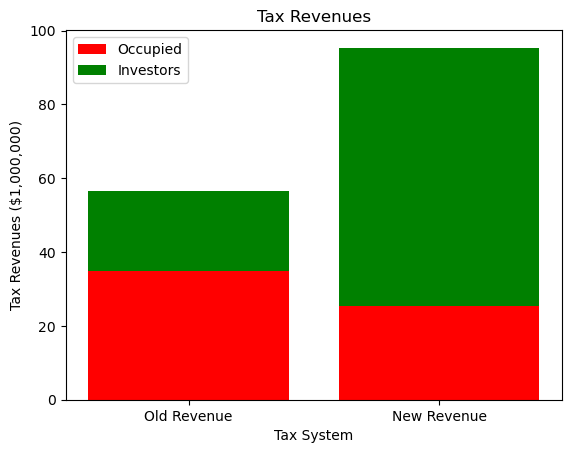

In [119]:
bar_labels = ['Old Revenue', 'New Revenue']
y_old_sum = [oocc_old_sum/1e6, investors_old_sum/1e6]
y_new_sales_tax_sum = [oocc_sales_tax_sum/1e6, investors_sales_tax_sum/1e6]

plt.bar(bar_labels, y_old_sum, color='r')
plt.bar(bar_labels, y_new_sales_tax_sum, bottom=y_old_sum, color='g')
# plt.bar(bar_labels, y_oocc_sales_tax_sum, bottom=y_oocc_old_sum, color='b')
# plt.bar(bar_labels, y_investors_old_sum, color='g')
# plt.bar(bar_labels, y_investors_sales_tax_sum, bottom=y_investors_old_sum, color='m')
plt.title("Tax Revenues")
plt.xlabel("Tax System")
plt.ylabel("Tax Revenues ($1,000,000)")
plt.legend(["Occupied", "Investors"])
plt.show()

## Boxplot (quartile range of bottom 100 income vs highest 100 income taxes paid under old and new system)

In [94]:
# bklyn_investors_highlow = bklyn_investors.sort_values('Household Income', ascending=False)
# bklyn_investors_highlow .head()

,Count,Zipcode,Owner Occ?,Purchase Down %,Purchase Amt,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Population,Median Age,Household Income,Median Gross Rent,Zip,Tot tax pd,Mtax as % Household Income,Months rent spent on Mtax,New Sales Tax Pd % Household Income
1763,1,11215,1,20.0,1550000,1240000.0,24180.0,15500.0,68789.00,72014.0,37.2,173899.0,2673.0,11215,39680.0,13.904623,0.110546,39.556869
1707,1,11215,1,100.0,675000,0.0,0.0,0.0,29956.50,72014.0,37.2,173899.0,2673.0,11215,0.0,0.000000,inf,17.226379
1779,1,11215,1,100.0,6987500,0.0,0.0,69875.0,310105.25,72014.0,37.2,173899.0,2673.0,11215,69875.0,0.000000,inf,178.324918
1721,1,11215,1,10.0,495000,445500.0,8019.0,0.0,21968.10,72014.0,37.2,173899.0,2673.0,11215,8019.0,4.611297,0.333333,12.632678
1777,1,11215,1,0.0,1170000,1370000.0,26715.0,11700.0,51924.60,72014.0,37.2,173899.0,2673.0,11215,38415.0,15.362366,0.100056,29.859056


In [95]:
# bklyn_investors_lowhigh = bklyn_investors.sort_values('Household Income', ascending=True)
# bklyn_investors_lowhigh.head()

,Count,Zipcode,Owner Occ?,Purchase Down %,Purchase Amt,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Population,Median Age,Household Income,Median Gross Rent,Zip,Tot tax pd,Mtax as % Household Income,Months rent spent on Mtax,New Sales Tax Pd % Household Income
2018,1,11212,1,5.0,495000,470250.0,8464.5000,0.0,21968.10,84006.0,37.2,35840.0,1150.0,11212,8464.5000,23.617467,0.135862,61.294922
2030,1,11212,1,2.0,580000,569494.0,11105.1330,0.0,25740.40,84006.0,37.2,35840.0,1150.0,11212,11105.1330,30.985304,0.103556,71.820312
2019,1,11212,1,3.0,579500,560133.0,10922.5935,0.0,25718.21,84006.0,37.2,35840.0,1150.0,11212,10922.5935,30.475986,0.105286,71.758398
2032,1,11212,1,0.0,485000,471127.0,8480.2860,0.0,21524.30,84006.0,37.2,35840.0,1150.0,11212,8480.2860,23.661512,0.135609,60.056641
2031,1,11212,1,24.0,510000,390000.0,7020.0000,0.0,22633.80,84006.0,37.2,35840.0,1150.0,11212,7020.0000,19.587054,0.163818,63.152344


In [97]:
bklyn_oocc_highlow = bklyn_oocc.sort_values('Household Income', ascending=False)
bklyn_oocc_highlow.head()

,Count,Zipcode,Owner Occ?,Purchase Down %,Purchase Amt,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Population,Median Age,Household Income,Median Gross Rent,Zip,Tot tax pd,Mtax as % Household Income,Months rent spent on Mtax,New Sales Tax Pd % Household Income
287,1,11215,0,100.0,1650000,0.0,0.0,16500.0,14850.0,72014.0,37.2,173899.0,2673.0,11215,16500.0,0.000000,inf,8.539440
335,1,11215,0,100.0,699000,0.0,0.0,0.0,9786.0,72014.0,37.2,173899.0,2673.0,11215,0.0,0.000000,inf,5.627404
282,1,11215,0,20.0,1599000,1279200.0,24944.4,15990.0,14391.0,72014.0,37.2,173899.0,2673.0,11215,40934.4,14.344188,0.107158,8.275493
264,1,11215,0,20.0,1595000,1276000.0,24882.0,15950.0,14355.0,72014.0,37.2,173899.0,2673.0,11215,40832.0,14.308305,0.107427,8.254792
222,1,11215,0,22.0,900000,700000.0,13650.0,0.0,12600.0,72014.0,37.2,173899.0,2673.0,11215,13650.0,7.849384,0.195824,7.245585


In [99]:
bklyn_oocc_lowhigh = bklyn_oocc.sort_values('Household Income', ascending=True)
bklyn_oocc_lowhigh.head()

,Count,Zipcode,Owner Occ?,Purchase Down %,Purchase Amt,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Population,Median Age,Household Income,Median Gross Rent,Zip,Tot tax pd,Mtax as % Household Income,Months rent spent on Mtax,New Sales Tax Pd % Household Income
909,1,11212,0,30.0,650000,452500.0,8145.00,0.0,9100.0,84006.0,37.2,35840.0,1150.0,11212,8145.00,22.726004,0.141191,25.390625
877,1,11212,0,10.0,628000,565200.0,11021.40,0.0,8792.0,84006.0,37.2,35840.0,1150.0,11212,11021.40,30.751674,0.104342,24.531250
875,1,11212,0,2.0,615000,603860.0,11775.27,0.0,8610.0,84006.0,37.2,35840.0,1150.0,11212,11775.27,32.855106,0.097662,24.023438
872,1,11212,0,0.0,533000,533000.0,10393.50,0.0,7462.0,84006.0,37.2,35840.0,1150.0,11212,10393.50,28.999721,0.110646,20.820312
879,1,11212,0,12.0,680500,601400.0,11727.30,0.0,9527.0,84006.0,37.2,35840.0,1150.0,11212,11727.30,32.721261,0.098062,26.582031


In [122]:
lowest_brooklyn_df = bklyn_oocc_lowhigh.loc[0:99]

# top5_brooklyn_df.set_index(["Zipcode"], inplace=True)
# top5_brooklyn_df
lowest_brooklyn_df.head()

,Count,Zipcode,Owner Occ?,Purchase Down %,Purchase Amt,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Population,Median Age,Household Income,Median Gross Rent,Zip,Tot tax pd,Mtax as % Household Income,Months rent spent on Mtax,New Sales Tax Pd % Household Income
0,1,11201,0,33.0,4600000,3062500.0,59718.75,46000.0,41400.0,69755.0,35.1,163310.0,3110.0,11201,105718.75,36.567724,0.052077,25.350560
1560,1,11201,0,20.0,1300000,1040000.0,20280.00,13000.0,11700.0,69755.0,35.1,163310.0,3110.0,11201,33280.00,12.418101,0.153353,7.164289
547,1,11201,0,10.0,687000,618300.0,12056.85,0.0,9618.0,69755.0,35.1,163310.0,3110.0,11201,12056.85,7.382800,0.257945,5.889413
65,1,11201,0,36.0,780000,500000.0,9750.00,0.0,10920.0,69755.0,35.1,163310.0,3110.0,11201,9750.00,5.970241,0.318974,6.686670
3,1,11201,0,20.0,3700000,2960000.0,57720.00,37000.0,33300.0,69755.0,35.1,163310.0,3110.0,11201,94720.00,35.343825,0.053881,20.390668


In [123]:
highest_brooklyn_df = bklyn_oocc_highlow.loc[0:99]

# top5_brooklyn_df.set_index(["Zipcode"], inplace=True)
# top5_brooklyn_df
highest_brooklyn_df.head()

,Count,Zipcode,Owner Occ?,Purchase Down %,Purchase Amt,Amount Mortgaged,Mtg Tx Pd,Mansion Tax Pd,New Sales Tax Amount,Population,Median Age,Household Income,Median Gross Rent,Zip,Tot tax pd,Mtax as % Household Income,Months rent spent on Mtax,New Sales Tax Pd % Household Income
0,1,11201,0,33.0,4600000,3062500.0,59718.75,46000.0,41400.0,69755.0,35.1,163310.0,3110.0,11201,105718.75,36.567724,0.052077,25.350560
108,1,11201,0,30.0,1500000,1050000.0,20475.00,15000.0,13500.0,69755.0,35.1,163310.0,3110.0,11201,35475.00,12.537505,0.151893,8.266487
95,1,11201,0,30.0,4200000,2940000.0,57330.00,42000.0,37800.0,69755.0,35.1,163310.0,3110.0,11201,99330.00,35.105015,0.054247,23.146164
104,1,11201,0,20.0,1350000,1080000.0,21060.00,13500.0,12150.0,69755.0,35.1,163310.0,3110.0,11201,34560.00,12.895720,0.147673,7.439838
561,1,11201,0,20.0,815000,652000.0,12714.00,0.0,11410.0,69755.0,35.1,163310.0,3110.0,11201,12714.00,7.785194,0.244612,6.986712


In [ ]:
low_income = lowest_brooklyn_df['Mtax as % Household Income']
high_income = highest_brooklyn_df['Mtax as % Household Income']

new_low_income = lowest_brooklyn_df['New Sales Tax Pd % Household Income']
new_high_income = highest_brooklyn_df['New Sales Tax Pd % Household Income']

In [126]:
quartiles = low_income.quantile([.25,.5,.75])
quartiles

0.25     8.219296
0.50    18.768315
0.75    25.514528
Name: Mtax as % Household Income, dtype: float64

In [127]:
quartiles = high_income.quantile([.25,.5,.75])
quartiles

0.25     0.000000
0.50     7.288714
0.75    11.356376
Name: Mtax as % Household Income, dtype: float64

In [128]:
quartiles = new_low_income.quantile([.25,.5,.75])
quartiles

0.25    16.591879
0.50    20.704524
0.75    23.341156
Name: New Sales Tax Pd % Household Income, dtype: float64

In [129]:
quartiles = new_high_income.quantile([.25,.5,.75])
quartiles

0.25     6.814300
0.50     8.642948
0.75    30.465169
Name: New Sales Tax Pd % Household Income, dtype: float64

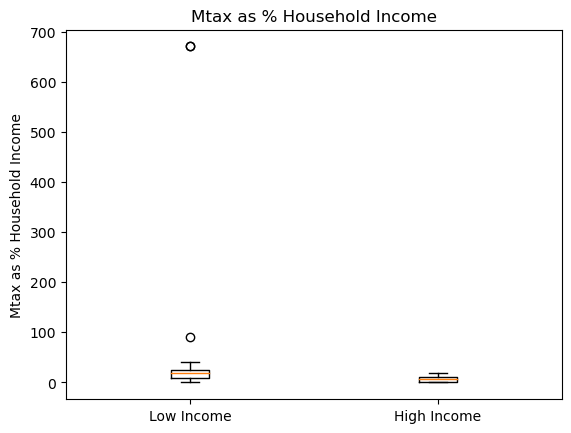

In [124]:
fig, ax = plt.subplots()
ax.set_title('Mtax as % Household Income')
ax.set_ylabel('Mtax as % Household Income')
ax.boxplot([low_income, high_income], labels=['Low Income', 'High Income'])
plt.show()

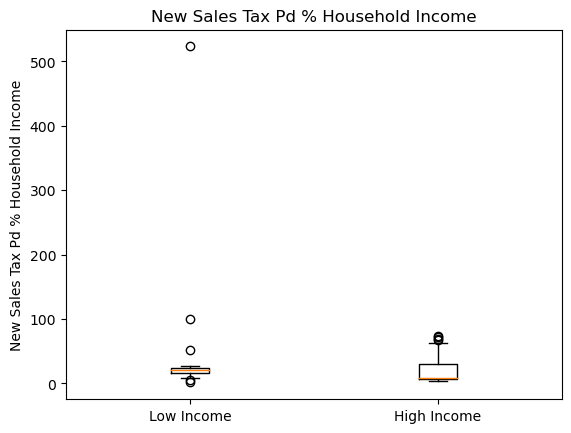

In [125]:
fig, ax = plt.subplots()
ax.set_title('New Sales Tax Pd % Household Income')
ax.set_ylabel('New Sales Tax Pd % Household Income')
ax.boxplot([new_low_income, new_high_income], labels=['Low Income', 'High Income'])
plt.show()

In [50]:
# fourframes= [bklyn_oocc, bklyn_investors, high_low_oocc, high_low_investors]

column_load = {'Count': 'sum', "Population": 'mean', 'Count': 'sum', 'Purchase Amt': 'mean',
           'Amount Mortgaged': 'mean','Mtg Tx Pd': 'mean', 'Mtax as % Household Income': 'mean', 
            'Months rent spent on Mtax': 'median',
           'Mansion Tax Pd': 'mean', 'New Sales Tax Amount': 'mean', 'Household Income': 'mean'}


In [51]:
bklyn_investors_by_zip = pd.DataFrame(data = bklyn_investors)
bklyn_investors_by_zip = bklyn_investors_by_zip.groupby(['Zipcode']).agg(column_load).reset_index()
#bklyn_investors_by_zip = bklyn_investors_by_zip.applymap("{:.2f}".format)
bklyn_investors_by_zip.head()

,Zipcode,Count,Population,Purchase Amt,Amount Mortgaged,Mtg Tx Pd,Mtax as % Household Income,Months rent spent on Mtax,Mansion Tax Pd,New Sales Tax Amount,Household Income
0,11201,99,69755.0,1.962489e+06,1.015427e+06,19717.792727,12.073843,0.228165,16866.384444,87095.270786,163310.0
1,11203,38,78506.0,6.818104e+05,5.552708e+05,10681.776592,15.707109,0.131385,0.000000,30258.745318,68006.0
2,11204,29,80575.0,7.463172e+05,3.987328e+05,7464.662069,11.632273,0.233150,1133.793103,33121.559172,64172.0
3,11205,14,50319.0,1.200321e+06,7.030594e+05,13689.710786,18.292215,0.135579,11003.214286,53270.265000,74839.0
4,11206,14,89949.0,9.063571e+05,4.861980e+05,9380.331857,18.211761,0.145494,2803.571429,40224.130000,51507.0


In [52]:
bklyn_oocc_by_zip = pd.DataFrame(bklyn_oocc)
bklyn_oocc_by_zip = bklyn_oocc_by_zip.groupby(['Zip'], axis=0).agg(column_load)
#bklyn_oocc_by_zip = bklyn_oocc_by_zip.applymap("{:.2f}".format)
bklyn_oocc_by_zip.head()

,Count,Population,Purchase Amt,Amount Mortgaged,Mtg Tx Pd,Mtax as % Household Income,Months rent spent on Mtax,Mansion Tax Pd,New Sales Tax Amount,Household Income
Zip,,,,,,,,,,
11201,169,69755.0,2.027140e+06,942050.727811,18308.300982,11.210765,0.233168,17842.810651,19458.557905,163310.0
11203,15,78506.0,6.568000e+05,534682.866667,10305.110900,15.153238,0.141975,0.000000,9195.200000,68006.0
11204,23,80575.0,7.238261e+05,437867.391304,8342.236957,12.999808,0.194097,1086.956522,9590.086957,64172.0
11205,27,50319.0,1.055367e+06,480921.037037,9287.749778,12.410307,0.196815,5258.111111,12146.077778,74839.0
11206,22,89949.0,8.425088e+05,480980.227273,9283.226932,18.023234,0.138893,3527.727273,10031.259818,51507.0


In [53]:
bklyn_oocc_by_zip.describe()

,Count,Population,Purchase Amt,Amount Mortgaged,Mtg Tx Pd,Mtax as % Household Income,Months rent spent on Mtax,Mansion Tax Pd,New Sales Tax Amount,Household Income
count,37.000000,37.000000,3.700000e+01,3.700000e+01,37.000000,37.000000,37.000000,37.000000,37.000000,37.000000
mean,42.756757,71967.594595,1.103841e+06,6.079533e+05,11721.331188,15.219864,0.182782,6491.286709,12208.129197,83071.324324
std,37.548787,20689.070470,4.640992e+05,2.744334e+05,5392.141412,9.420054,0.040614,5951.060185,3571.412773,32926.576912
min,9.000000,28137.000000,5.236428e+05,3.279455e+05,6186.245455,8.704917,0.112983,0.000000,7330.999000,35840.000000
25%,17.000000,58047.000000,7.418942e+05,4.283830e+05,8233.053828,11.275858,0.149529,1338.888889,9693.000000,61320.000000
50%,28.000000,73318.000000,9.558139e+05,5.503540e+05,10706.472563,12.642553,0.173183,5020.606061,11290.953608,77600.000000
75%,51.000000,89976.000000,1.385770e+06,6.862182e+05,13323.514445,15.661759,0.208782,10141.792453,14490.027273,91379.000000
max,169.000000,108180.000000,2.068836e+06,1.795610e+06,34890.158100,66.370215,0.299603,18890.625000,20927.703440,173899.000000


In [54]:
bklyn_investors_by_zip[['Count', 'Population', 'Purchase Amt',
       'Amount Mortgaged', 'Mtg Tx Pd', 'Mansion Tax Pd',
       'New Sales Tax Amount', 'Household Income']]=bklyn_investors_by_zip[['Count', 'Population', 'Purchase Amt', 
       'Amount Mortgaged', 'Mtg Tx Pd', 'Mansion Tax Pd',
       'New Sales Tax Amount', 'Household Income']].astype('float64')
bklyn_investors_by_zip.sort_values(by=['Household Income'], inplace=True)
bklyn_investors_by_zip.head()

,Zipcode,Count,Population,Purchase Amt,Amount Mortgaged,Mtg Tx Pd,Mtax as % Household Income,Months rent spent on Mtax,Mansion Tax Pd,New Sales Tax Amount,Household Income
10,11212,14.0,84006.0,560250.000000,506145.785714,9586.195286,26.747197,0.115585,0.000000,24863.895000,35840.0
36,11239,3.0,16808.0,515000.000000,437021.000000,8156.034500,21.091374,0.132139,0.000000,22855.700000,38670.0
22,11224,32.0,47893.0,665546.656250,353753.125000,6648.731250,16.430008,0.146144,430.625000,29536.960604,40467.0
17,11219,20.0,92283.0,795525.000000,450693.750000,8550.778125,16.702696,0.248031,3111.250000,35305.399500,51194.0
4,11206,14.0,89949.0,906357.142857,486198.000000,9380.331857,18.211761,0.145494,2803.571429,40224.130000,51507.0


In [55]:
bklyn_oocc_by_zip[['Count', 'Population', 'Purchase Amt',
       'Amount Mortgaged', 'Mtg Tx Pd', 'Mansion Tax Pd',
       'New Sales Tax Amount', 'Household Income']]=bklyn_oocc_by_zip[['Count', 'Population', 'Purchase Amt', 
       'Amount Mortgaged', 'Mtg Tx Pd', 'Mansion Tax Pd',
       'New Sales Tax Amount', 'Household Income']].astype('float64')
bklyn_oocc_by_zip.sort_values(by=['Household Income'], inplace=True)
bklyn_oocc_by_zip.head()

,Count,Population,Purchase Amt,Amount Mortgaged,Mtg Tx Pd,Mtax as % Household Income,Months rent spent on Mtax,Mansion Tax Pd,New Sales Tax Amount,Household Income
Zip,,,,,,,,,,
11212,13.0,84006.0,5.791115e+05,4.720915e+05,9013.264269,25.148617,0.112983,0.000000,8107.561538,35840.0
11224,18.0,47893.0,7.169278e+05,3.802570e+05,7184.919833,17.755010,0.143246,1300.000000,9386.988889,40467.0
11219,11.0,92283.0,6.680036e+05,3.279455e+05,6186.245455,12.083927,0.236620,1054.545455,8824.778182,51194.0
11206,22.0,89949.0,8.425088e+05,4.809802e+05,9283.226932,18.023234,0.138893,3527.727273,10031.259818,51507.0
11207,25.0,96801.0,2.068836e+06,1.795610e+06,34890.158100,66.370215,0.208782,16072.000000,20927.703440,52569.0


In [56]:
bklyn_oocc_by_zip['mtg %'] = bklyn_oocc_by_zip['Amount Mortgaged']/bklyn_oocc_by_zip['Purchase Amt']*100
bklyn_investors_by_zip['mtg %'] = bklyn_investors_by_zip['Amount Mortgaged']/bklyn_investors_by_zip['Purchase Amt']*100
bklyn_oocc_by_zip.head()

,Count,Population,Purchase Amt,Amount Mortgaged,Mtg Tx Pd,Mtax as % Household Income,Months rent spent on Mtax,Mansion Tax Pd,New Sales Tax Amount,Household Income,mtg %
Zip,,,,,,,,,,,
11212,13.0,84006.0,5.791115e+05,4.720915e+05,9013.264269,25.148617,0.112983,0.000000,8107.561538,35840.0,81.519954
11224,18.0,47893.0,7.169278e+05,3.802570e+05,7184.919833,17.755010,0.143246,1300.000000,9386.988889,40467.0,53.039792
11219,11.0,92283.0,6.680036e+05,3.279455e+05,6186.245455,12.083927,0.236620,1054.545455,8824.778182,51194.0,49.093364
11206,22.0,89949.0,8.425088e+05,4.809802e+05,9283.226932,18.023234,0.138893,3527.727273,10031.259818,51507.0,57.089044
11207,25.0,96801.0,2.068836e+06,1.795610e+06,34890.158100,66.370215,0.208782,16072.000000,20927.703440,52569.0,86.793234


In [57]:
col_to_plot = ['Purchase Amt', 'Amount Mortgaged',
       'Mtg Tx Pd', 'Mtax as % Household Income', 'Months rent spent on Mtax',
       'New Sales Tax Amount',
       'mtg %']

def plotscat(col_to_plot, df):
    fig, axes = plt.subplots(nrows=len(col_to_plot), ncols=1, figsize=(8, 2 * len(col_to_plot)))
    for i, column in enumerate(col_to_plot):
        axes[i].scatter(df['Household Income'], df[column])
        axes[i].set_title(f'Scatter Plot: Household Income vs {column}')
        axes[i].set_xlabel('Household Income')
        axes[i].set_ylabel(column)
    plt.tight_layout()
    plt.show()

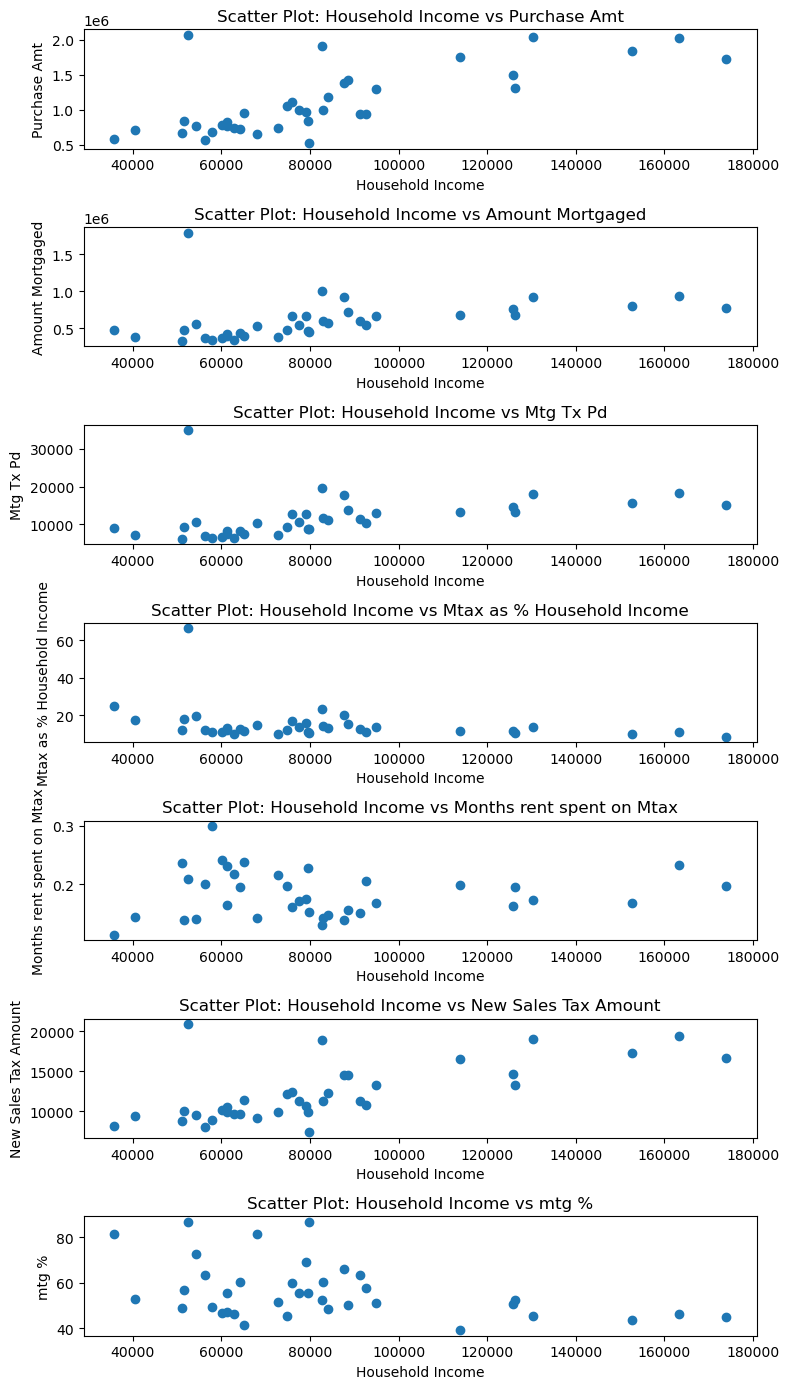

In [58]:
plotscat(col_to_plot, bklyn_oocc_by_zip)

In [59]:
bklyn_oocc_by_zip.shape

(37, 11)

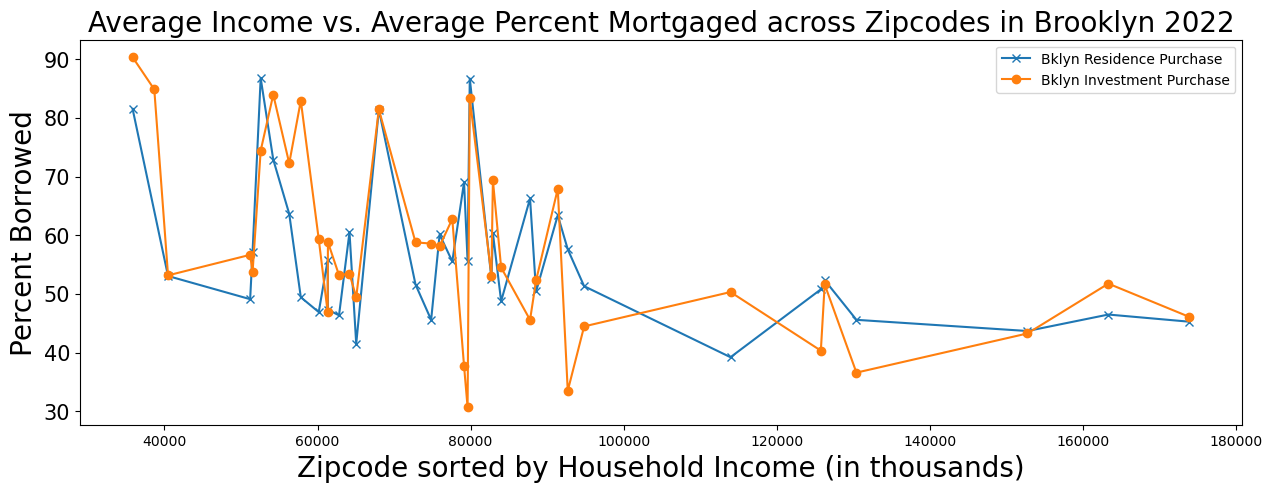

In [60]:
plt.figure(figsize=(15,5))

plt.plot(bklyn_oocc_by_zip['Household Income'], bklyn_oocc_by_zip['mtg %'], marker="x", label='Bklyn Residence Purchase')
plt.plot(bklyn_investors_by_zip['Household Income'], bklyn_investors_by_zip['mtg %'], marker="o", label='Bklyn Investment Purchase')
plt.yticks(fontsize=15)
plt.xlabel('Zipcode sorted by Household Income (in thousands)', fontsize=20)
plt.ylabel('Percent Borrowed', fontsize=20)
plt.title('Average Income vs. Average Percent Mortgaged across Zipcodes in Brooklyn 2022', fontsize=20)
plt.legend()
plt.show()

In [ ]:
#########??? do we still need this?

# plt.figure(figsize=(15,5))

# plt.plot(high_low_oocc_by_zip['Household Income'], high_low_oocc_by_zip['mtg %'], marker="x", label='high_low Residence Purchase')
# plt.plot(high_low_oocc_by_zip['Household Income'], high_low_investors_by_zip['mtg %'], marker="o", label='high_low Investment Purchase')
# #plt.plot(manhatt_oocc_df['Per Capita Income'], investor_by_zip["total_tax_paid"], marker="o", label='Total Tax Paid')
# #plt.xticks(high_low_oocc_df['Per Capita Income'], rotation=90)
# #plt.xticks(), fontsize=15, rotation='vertical')
# plt.yticks(fontsize=15)
# plt.xlabel('Zipcode sorted by Household Income (in thousands)', fontsize=20)
# plt.ylabel('Percent Borrowed', fontsize=20)
# plt.title('Average Income vs. Average Percent Borrowed across Zipcodes in Brooklyn 2022', fontsize=20)
# plt.legend()
# plt.show()

In [ ]:
# plt.figure(figsize=(15,5))

# plt.plot(high_low_oocc_by_zip['Per Capita Income'], yaxis, marker="x", label='Bklyn Residence Purchase')
# plt.plot(high_low_oocc_by_zip['Per Capita Income'], high_low_investors_by_zip['% borrowed'], marker="o", label='Bklyn Investment Purchase')
#     #plt.plot(manhatt_oocc_df['Per Capita Income'], investor_by_zip["total_tax_paid"], marker="o", label='Total Tax Paid')
#     #plt.xticks(bklyn_oocc_df['Per Capita Income'], rotation=90)
#     #plt.xticks(), fontsize=15, rotation='vertical')
# plt.yticks(fontsize=15)
# plt.xlabel('Zipcode sorted by Per Capita Income (in thousands)', fontsize=20)
# plt.ylabel('Percent Borrowed', fontsize=20)
# plt.title('Average Income vs. Average Percent Borrowed across Zipcodes in other 8 2022', fontsize=20)
# plt.legend()
# plt.show()

In [ ]:
#make a chart of the % borrowed for the zip in ascending order but first sort dfs in order

#fig = plt.figure()
#ax1 = fig.add_subplot()



# bklyn_sorted.plot('Household Income', 'mtg %')
# plt.show()

#bklyn_oocc_by_zip.set_index(['Per Capita Income'), inplace = True)
#bklyn_oocc_by_zip.sort_index()
#bklyn_investors_by_zip.sort_values('Per Capita Income', inplace = True)
#bklyn_investors_by_zip.sort_index()
#bklyn_oocc_df['perCI'] = bklyn_oocc_df.index.astype(str)
#manhattan_oocc_df.set_index('Per Capita Income', inplace = True)
# #manhattan_investor_df.set_index('Per Capita Income', inplace = True)

# graphaxis1 = pd.DataFrame(bklyn_oocc_by_zip['Per Capita Income'], ['% borrowed'])

# plt.figure(figsize=(15,10))



# plt.plot(graphaxis1['Per Capita Income'], graphaxis1['% borrowed'], marker="x", label='Bklyn Residence Purchase')
# #plt.plot(x = bklyn_investors_by_zip['Per Capita Income'], y =bklyn_investors_by_zip['% borrowed'], marker="o", label='Bklyn Investment Purchase')
# #plt.plot(manhatt_oocc_df['Per Capita Income'], investor_by_zip["total_tax_paid"], marker="o", label='Total Tax Paid')
# #plt.xticks(bklyn_oocc_df['Per Capita Income'], rotation=90)
# plt.xticks(['Per Capita Income'], fontsize=15, rotation='vertical')
# plt.yticks(fontsize=15)
# plt.xlabel('Zipcode sorted by Per Capita Income (in thousands)', fontsize=20)
# plt.ylabel('Percent Borrowed', fontsize=20)
# plt.title('Average Income vs. Average Percent Borrowed across Zipcodes in Brooklyn 2022', fontsize=20)
# plt.legend()
# plt.show()

In [ ]:
bklyn_oocc.head()

In [ ]:
bklyn_oocc = bklyn_oocc.groupby(['Zipcode']).agg({'Count': 'sum', 'Purchase Amt': 'mean', #                                                             'Purchase Down %': 'mean', '% borrowed': 'mean',
                                                            'Amount Mortgaged': 'mean', 
                                                            'Mtg Tx Pd': 'mean', 'Mansion Tax Pd': 'mean', 
                                                            'New Sales Tax Amount': 'mean',
                                                             'Household Income': 'mean'})

# bklyn_oocc = bklyn_oocc.applymap("{:.2f}".format)
bklyn_oocc.head()

In [ ]:
# high_low_oocc = high_low_oocc.groupby(['Zipcode']).agg({'Zipcode': 'Zipcode', "Population": 'mean', 'Count': 'sum', 'Purchase Amt': 'mean',
#            'Purchase Down %': 'mean', 'mtg %': 'mean',
#            'Amount Mortgaged': 'mean','Mtg Tx Pd': 'mean',
#            'Mansion Tax Pd': 'mean', 'New Sales Tax Amount': 'mean'})

# high_low_oocc = high_low_oocc.applymap("{:.2f}".format)
# high_low_oocc.head()

In [ ]:
#bklyn_oocc.set_index('Per Capita Income', inplace = True)
bklyn_investors.set_index('Household Income', inplace = True)
# bklyn_oocc['perCI'] = bklyn_oocc.index.astype(str)
# # manhattan_oocc_df.set_index('Per Capita Income', inplace = True)
# # manhattan_investor_df.set_index('Per Capita Income', inplace = True)


# plt.figure(figsize=(15,5))



plt.plot(bklyn_oocc['Household Income'], bklyn_oocc['mtg %'], marker="x", label='Bklyn Residence Purchase')
plt.plot(bklyn_oocc['perCI'], bklyn_investors['mtg %'], marker="o", label='Bklyn Investment Purchase')
# #plt.plot(manhatt_oocc_df['Per Capita Income'], investor_by_zip["total_tax_paid"], marker="o", label='Total Tax Paid')
# #plt.xticks(bklyn_oocc_df['Per Capita Income'], rotation=90)
# plt.xticks(range(len(bklyn_oocc['Zip'])), fontsize=15, rotation='vertical')
# plt.yticks(fontsize=15)
# plt.xlabel('Zipcode sorted by Per Capita Income (in thousands)', fontsize=20)
# plt.ylabel('Percent Borrowed', fontsize=20)
# plt.title('Average Income vs. Average Percent Borrowed across Zipcodes in Brooklyn 2022', fontsize=20)
# plt.legend()
# plt.show()

bklyn_oocc.head()

In [ ]:
#the next few cells seperate the data into 4 data frames, first by owner 
#2 for brooklyn, and two for the other zips,
#each of these are then sp


owner_occ_by_zip = bklyn_oocc.groupby(['Zipcode']).agg({'Count': 'sum', 'Purchase Amt': 'mean', 
                                                            'Purchase Down %': 'mean',
                                                            'Amount Mortgaged': 'mean', 
                                                            'Mtg Tx Pd': 'mean', 'Mansion Tax Pd': 'mean', 
                                                            'New Sales Tax Amount': 'mean', 
                                                            })


owner_occ_by_zip["Purchase Amt"] = owner_occ_by_zip["Purchase Amt"] / 1000
owner_occ_by_zip["Amount Mortgaged"] = owner_occ_by_zip["Amount Mortgaged"] / 1000
owner_occ_by_zip["Mtg Tx Pd"] = owner_occ_by_zip["Mtg Tx Pd"] / 1000
owner_occ_by_zip["Mansion Tax Pd"] = owner_occ_by_zip["Mansion Tax Pd"] / 1000
owner_occ_by_zip["New Sales Tax Amount"] = owner_occ_by_zip["New Sales Tax Amount"] / 1000
#owner_occ_by_zip["Per Capita Income"] = owner_occ_by_zip["Per Capita Income"] / 1000

owner_occ_by_zip["Purchase Amt"] = owner_occ_by_zip["Purchase Amt"].map("{:.2f}".format)
owner_occ_by_zip["Purchase Down %"] = owner_occ_by_zip["Purchase Down %"].map("{:.2f}".format)
owner_occ_by_zip["Amount Mortgaged"] = owner_occ_by_zip["Amount Mortgaged"].map("{:.2f}".format)
owner_occ_by_zip["Mtg Tx Pd"] = owner_occ_by_zip["Mtg Tx Pd"].map("{:.2f}".format)
owner_occ_by_zip["Mansion Tax Pd"] = owner_occ_by_zip["Mansion Tax Pd"].map("{:.2f}".format)
owner_occ_by_zip["New Sales Tax Amount"] = owner_occ_by_zip["New Sales Tax Amount"].map("{:.2f}".format)
#owner_occ_by_zip["Per Capita Income"] = owner_occ_by_zip["Per Capita Income"].map("{:.2f}".format)

owner_occ_by_zip["Purchase Amt"] = owner_occ_by_zip["Purchase Amt"].astype("float")
owner_occ_by_zip["Purchase Down %"] = owner_occ_by_zip["Purchase Down %"].astype("float")
owner_occ_by_zip["Amount Mortgaged"] = owner_occ_by_zip["Amount Mortgaged"].astype("float")
owner_occ_by_zip["Mtg Tx Pd"] = owner_occ_by_zip["Mtg Tx Pd"].astype("float")
owner_occ_by_zip["Mansion Tax Pd"] = owner_occ_by_zip["Mansion Tax Pd"].astype("float")
owner_occ_by_zip["New Sales Tax Amount"] = owner_occ_by_zip["New Sales Tax Amount"].astype("float")
#owner_occ_by_zip["Per Capita Income"] = owner_occ_by_zip["Per Capita Income"].astype("float")

In [ ]:
investor_by_zip = investor_df.groupby(['Zipcode']).agg({'Count': 'sum', 'Purchase Amt': 'mean', 
                                                            'Purchase Down %': 'mean',
                                                            'Amount Mortgaged': 'mean', 
                                                            'Mtg Tx Pd': 'mean', 'Mansion Tax Pd': 'mean', 
                                                            'New Sales Tax Amount': 'mean', 
                                                            })


investor_by_zip["Purchase Amt"] = investor_by_zip["Purchase Amt"] / 1000
investor_by_zip["Amount Mortgaged"] = investor_by_zip["Amount Mortgaged"] / 1000
investor_by_zip["Mtg Tx Pd"] = investor_by_zip["Mtg Tx Pd"] / 1000
investor_by_zip["Mansion Tax Pd"] = investor_by_zip["Mansion Tax Pd"] / 1000
investor_by_zip["New Sales Tax Amount"] = investor_by_zip["New Sales Tax Amount"] / 1000
#investor_by_zip["Per Capita Income"] = investor_by_zip["Per Capita Income"] / 1000

investor_by_zip["Purchase Amt"] = investor_by_zip["Purchase Amt"].map("{:.2f}".format)
investor_by_zip["Purchase Down %"] = investor_by_zip["Purchase Down %"].map("{:.2f}".format)
investor_by_zip["Amount Mortgaged"] = investor_by_zip["Amount Mortgaged"].map("{:.2f}".format)
investor_by_zip["Mtg Tx Pd"] = investor_by_zip["Mtg Tx Pd"].map("{:.2f}".format)
investor_by_zip["Mansion Tax Pd"] = investor_by_zip["Mansion Tax Pd"].map("{:.2f}".format)
investor_by_zip["New Sales Tax Amount"] = investor_by_zip["New Sales Tax Amount"].map("{:.2f}".format)
#investor_by_zip["Per Capita Income"] = investor_by_zip["Per Capita Income"].map("{:.2f}".format)

investor_by_zip["Purchase Amt"] = investor_by_zip["Purchase Amt"].astype("float")
investor_by_zip["Purchase Down %"] = investor_by_zip["Purchase Down %"].astype("float")
investor_by_zip["Amount Mortgaged"] = investor_by_zip["Amount Mortgaged"].astype("float")
investor_by_zip["Mtg Tx Pd"] = investor_by_zip["Mtg Tx Pd"].astype("float")
investor_by_zip["Mansion Tax Pd"] = investor_by_zip["Mansion Tax Pd"].astype("float")
investor_by_zip["New Sales Tax Amount"] = investor_by_zip["New Sales Tax Amount"].astype("float")
#investor_by_zip["Per Capita Income"] = investor_by_zip["Per Capita Income"].astype("float")

In [ ]:
owner_occ_by_zip["total_tax_paid"] = owner_occ_by_zip["Mtg Tx Pd"] + owner_occ_by_zip["Mansion Tax Pd"]
owner_occ_by_zip['percent borrowed'] = 100 - owner_occ_by_zip['Purchase Down %']
owner_occ_by_zip['mtg tax as % of med income'] = owner_occ_by_zip['total_tax_paid']/owner_occ_by_zip['Household Income'] *100
owner_occ_by_zip['sales tax as % of med income'] = owner_occ_by_zip['New Sales Tax Amount']/owner_occ_by_zip['Household Income'] *100
owner_occ_by_zip.head(2)

In [ ]:
investor_by_zip["total_tax_paid"] = investor_by_zip["Mtg Tx Pd"] + investor_by_zip["Mansion Tax Pd"]
investor_by_zip['percent borrowed'] = 100 - investor_by_zip['Purchase Down %']
investor_by_zip['mtg tax as % of med income'] = investor_by_zip['total_tax_paid']/investor_by_zip['Per Capita Income'] *100
investor_by_zip['sales tax as % of med income'] = investor_by_zip['New Sales Tax Amount']/investor_by_zip['Per Capita Income'] *100
investor_by_zip.head(2)

In [ ]:
investor_by_zip.dtypes

In [ ]:
zipcode_list = investor_by_zip.index.values.astype("str")
zipcode_list

## zipcodes of Manhattan: 10013, 10007, 10118, 10282, 10453, 11355, 10457, 11368
## The rest of zipcodes are in Brooklyn.

In [ ]:

manhattan_investor_df = investor_by_zip.loc[[10013, 10007, 10282, 10453, 11355, 10457, 11368], :].sort_values("Purchase Amt", ascending=False)
print(manhattan_df.shape)
manhattan_investor_df.head(8)

In [ ]:
manhattan_oocc_df = owner_occ_by_zip.loc[[10013, 10007, 10282, 10453, 11355, 10457, 11368], :].sort_values("Purchase Amt", ascending=False)
print(manhattan_oocc_df.shape)
manhattan_oocc_df.head(8)

In [ ]:
bklyn_investor_df = investor_by_zip.drop([10013, 10007, 10282, 10453, 11355, 10457, 11368], axis = 0)
bklyn_investor_df = bklyn_investor_df.sort_values("Purchase Amt", ascending=False)
print(bklyn_investor_df.shape)
bklyn_investor_df.head(8)

In [ ]:
bklyn_oocc_df = owner_occ_by_zip.drop([10013, 10007, 10282, 10453, 11355, 10457, 11368], axis = 0)
bklyn_oocc_df = bklyn_oocc_df.sort_values("Purchase Amt", ascending=False)
print(bklyn_oocc_df.shape)
bklyn_oocc_df.head()

In [ ]:

bklyn_oocc_df.set_index('Per Capita Income', inplace = True)
#bklyn_oocc_df['Zip'] = bklyn_oocc_df.index.astype(str)

bklyn_oocc_df.head(20)

In [ ]:
#make a chart of the % borrowed for the zip in ascending order but first sort dfs in order

bklyn_oocc_df.set_index('Per Capita Income', inplace = True)
bklyn_investor_df.set_index('Per Capita Income', inplace = True)
bklyn_oocc_df['perCI'] = bklyn_oocc_df.index.astype(str)
manhattan_oocc_df.set_index('Per Capita Income', inplace = True)
manhattan_investor_df.set_index('Per Capita Income', inplace = True)


plt.figure(figsize=(15,5))



plt.plot(bklyn_oocc_df['perCI'], bklyn_oocc_df['percent borrowed'], marker="x", label='Bklyn Residence Purchase')
plt.plot(bklyn_oocc_df['perCI'], bklyn_investor_df['percent borrowed'], marker="o", label='Bklyn Investment Purchase')
#plt.plot(manhatt_oocc_df['Per Capita Income'], investor_by_zip["total_tax_paid"], marker="o", label='Total Tax Paid')
#plt.xticks(bklyn_oocc_df['Per Capita Income'], rotation=90)
plt.xticks(range(len(bklyn_oocc_df['Zip'])), fontsize=15, rotation='vertical')
plt.yticks(fontsize=15)
plt.xlabel('Zipcode sorted by Per Capita Income (in thousands)', fontsize=20)
plt.ylabel('Percent Borrowed', fontsize=20)
plt.title('Average Income vs. Average Percent Borrowed across Zipcodes in Brooklyn 2022', fontsize=20)
plt.legend()
plt.show()

In [ ]:

plt.figure(figsize=(10,5))

plt.plot(manhattan_oocc_df['Zip'], manhattan_oocc_df['percent borrowed'], marker="x", label='manhattan Residence Purchase')
plt.plot(manhattan_investor_df['Zip'], manhattan_investor_df['percent borrowed'], marker="o", label='manhattan Investment Purchase')
plt.xticks(fontsize=15, rotation='vertical')
plt.yticks(fontsize=15)
plt.xlabel('Zipcode sorted by Per Capita Income', fontsize=20)
plt.ylabel('Percent Borrowed', fontsize=20)
plt.title('Average Income vs. Average Percent Borrowed across Zipcodes in Brooklyn 2022', fontsize=20)
plt.legend()
plt.show()

In [ ]:
#make a chart of the % borrowed for the zip in ascending order but first sort dfs in order
bklyn_oocc_df.sort_values(by =['Per Capita Income'], inplace=True)
bklyn_oocc_df['Zip'] = bklyn_oocc_df.index.astype(str)
bklyn_investor_df.sort_values(by =['Per Capita Income'], inplace=True)
bklyn_investor_df['Zip'] = bklyn_investor_df.index.astype(str)
manhattan_oocc_df.sort_values(by =['Per Capita Income'], inplace=True)
manhattan_oocc_df['Zip'] = manhattan_oocc_df.index.astype(str)
manhattan_investor_df.sort_values(by =['Per Capita Income'], inplace=True)
manhattan_investor_df['Zip'] = manhattan_investor_df.index.astype(str)

manhattan_investor_df.head(20)

plt.figure(figsize=(15,5))

plt.plot(bklyn_oocc_df['Zip'], bklyn_oocc_df['mtg tax as % of med income'], marker="x", label='Mtg tax as % of med income')
plt.plot(bklyn_investor_df['Zip'], bklyn_investor_df['percent borrowed'], marker="o", label='Sales tax as % of med income')
#plt.plot(manhatt_oocc_df['Per Capita Income'], investor_by_zip["total_tax_paid"], marker="o", label='Total Tax Paid')
#plt.xticks(bklyn_oocc_df['Per Capita Income'], rotation=90)
plt.xticks(fontsize=15, rotation='vertical')
plt.yticks(fontsize=15)
plt.xlabel('Zipcode sorted by Per Capita Income', fontsize=20)
plt.ylabel('Percent Borrowed', fontsize=20)
plt.title('Average Income vs. Average Percent Borrowed across Zipcodes in Brooklyn 2022', fontsize=20)
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(20,5))

plt.plot(zipcode_list, investor_by_zip["Per Capita Income"], marker="o", label='Per Capita Income')
plt.plot(zipcode_list, investor_by_zip["Purchase Amt"], marker="o", label='Purchase Amountt')
plt.plot(zipcode_list, investor_by_zip["total_tax_paid"], marker="o", label='Total Tax Paid')
plt.xticks(zipcode_list, rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Zipcode', fontsize=20)
plt.ylabel('Purchase Amount (in thousands)', fontsize=20)
plt.title('Average Income v.s. Average Purchase Amount across Zipcodes in NYC', fontsize=20)
plt.legend()
plt.show()

## Generate Manhattan dataframe

In [ ]:
mindex_list = manhattan_df.index.values

for zipcode in mindex_list:
    manhattan_df.rename(index={zipcode: str(zipcode)}, inplace=True)

manhattan_df.index.name = "Manhattan Zipcode"

mindex_list = manhattan_df.index.values 
mindex_list

In [ ]:
species = mindex_list

housing_data = {
    'Purchase Amt': manhattan_df["Purchase Amt"].values,
    'Amount Mortgaged': manhattan_df["Amount Mortgaged"].values,
    'Per Capita Income': manhattan_df["Per Capita Income"].values,
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15,6))

for attribute, measurement in housing_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Dollar Amount', fontsize=13)
ax.set_title('Purchase & Mortgage (in thousands) Per Capita Income (in thousands)', fontsize=13)
ax.set_xticks(x + width, species)
ax.set_xlabel("Manhattan Zipcode", fontsize=13)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 500)
plt.suptitle('Purchase Amount v.s. Amount Mortgaged v.s. Per Capita Income in Manhattan', fontsize=15)
plt.show()

In [ ]:
fig = plt.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

manhattan_df["Per Capita Income"].plot(kind='bar', color='Orange', ax=ax, width=width, position=1)
manhattan_df["total_tax_paid"].plot(kind='bar', color='green', ax=ax2, width=width, position=0)

ax.set_ylabel('Per Capita Income in Thousands')
ax2.set_ylabel('Total Taxes paid')
ax.set_title('Scale to the left for Income and to the right for Taxes (in thousands)')
plt.suptitle('Per Capita Income v.s. Total Taxes paid',fontsize=15, y=1)
ax.legend()
ax2.legend(loc=9)

plt.show()

## Generate Broolyn dataframe

In [ ]:
# brooklyn_df = investor_by_zip.drop([10013, 10007, 10282, 10453, 11355, 10457, 11368], axis=0)\
#                             .sort_values("Purchase Amt", ascending=False).reset_index()
# print(brooklyn_df.shape)

# top5_brooklyn_df = brooklyn_df.loc[0:4]

# top5_brooklyn_df.set_index(["Zipcode"], inplace=True)
# top5_brooklyn_df
bklyn_df.head()

In [ ]:
bklyn_income_df = bklyn_df.sort_values("Household Income", inplace=True)
bklyn_oocc_by_zip.head()

In [ ]:
#top5_bklyn_oocc_by_zip = bklyn_oocc_by_zip.loc[0:4]

In [ ]:
# index_list = top5_brooklyn_df.index.values

# for zipcode in index_list:
#     top5_brooklyn_df.rename(index={zipcode: str(zipcode)}, inplace=True)

# top5_brooklyn_df.index.name = "Brooklyn Top 5 Zipcode"

index_list = top5_brooklyn_df.index.values.astype("str")
index_list

In [ ]:
species = index_list

housing_data = {
    'Purchase Amt': top5_brooklyn_df["Purchase Amt"].values,
    'Amount Mortgaged': top5_brooklyn_df["Amount Mortgaged"].values,
    'Per Capita Income': top5_brooklyn_df["Per Capita Income"].values,
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(15,6))

for attribute, measurement in housing_data.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Dollar Amount', fontsize=13)
ax.set_title('Purchase & Mortgage (in thousands) Per Capita Income (in thousands)', fontsize=13)
ax.set_xticks(x + width, species)
ax.set_xlabel("Brooklyn Top 5 Zipcode", fontsize=13)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)
plt.suptitle('Top 5 Purchase Amount v.s. Amount Mortgaged v.s. Per Capita Income in Brooklyn', fontsize=15)
plt.show()

## Line Chart Brooklyn - showing the amount borrowed by income level

In [ ]:
complete_df.shape

In [ ]:
brooklyn_complete = complete_df.drop([10013, 10007, 10282, 10453, 11355, 10457, 11368], axis=0)
brooklyn_complete.shape

In [ ]:
brooklyn_by_zip = brooklyn_complete.groupby(['Zipcode']).agg({'Count': 'sum', 'Purchase Amt': 'mean', 
                                                            'Purchase Down %': 'mean',
                                                            'Amount Mortgaged': 'mean', 
                                                            'Mtg Tx Pd': 'mean', 'Mansion Tax Pd': 'mean', 
                                                            'New Sales Tax Amount': 'mean', 
                                                            'Per Capita Income': 'mean'})
brooklyn_by_zip.shape

In [ ]:
brooklyn_by_zip_income_level = brooklyn_by_zip.sort_values("Per Capita Income")
brooklyn_by_zip_income_level.head()

In [ ]:
brooklyn_by_zip_income_level['Zipcode'] = brooklyn_by_zip_income_level.index
final_brooklyn_by_zip_income_level = brooklyn_by_zip_income_level.set_index("Per Capita Income")
final_brooklyn_by_zip_income_level.head()

In [ ]:
investor_df = complete_df[(complete_df['Owner Occ?'] ==1)]
investor_df.shape

In [ ]:
investor_index = investor_df.drop([10013, 10007, 10282, 10453, 11355, 10457, 11368], axis=0)
investor_index.shape

In [ ]:
investor_by_zip = investor_index.groupby(['Zipcode']).agg({'Count': 'sum', 'Purchase Amt': 'mean', 
                                                            'Purchase Down %': 'mean',
                                                            'Amount Mortgaged': 'mean', 
                                                            'Mtg Tx Pd': 'mean', 'Mansion Tax Pd': 'mean', 
                                                            'New Sales Tax Amount': 'mean', 
                                                            'Per Capita Income': 'mean'})
investor_by_zip.shape

In [ ]:
investor_income_level = investor_by_zip.sort_values("Per Capita Income")
investor_income_level.head()

In [ ]:
home_owner_df = complete_df[(complete_df['Owner Occ?'] ==0)]
home_owner_df.shape

In [ ]:
home_owner_df = complete_df[(complete_df['Owner Occ?'] ==0)]
home_owner_df.shape 

In [ ]:
home_owner_df = complete_df[(complete_df['Owner Occ?'] ==0)]
zip_codes_to_drop = [10013, 10007, 10282, 10453, 11355, 10457, 11368]
home_owner_index = home_owner_df[~home_owner_df['Zipcode'].isin(zip_codes_to_drop)]
home_owner_index.shape

In [ ]:
home_owner_by_zip = home_owner_index.groupby(['Zipcode']).agg({'Count': 'sum', 'Purchase Amt': 'mean', 
                                                             'Purchase Down %': 'mean',
                                                             'Amount Mortgaged': 'mean', 
                                                             'Mtg Tx Pd': 'mean', 'Mansion Tax Pd': 'mean', 
                                                             'New Sales Tax Amount': 'mean', 
                                                             'Per Capita Income': 'mean'})
home_owner_by_zip.shape

In [ ]:
home_owner_by_zip_income_level = home_owner_by_zip.sort_values("Per Capita Income")
home_owner_by_zip_income_level.head()

In [ ]:
columns_to_select = ['Column1', 'Column2', 'Column3']

In [ ]:
plt.figure(figsize=(20,5))

x_axis = brooklyn_by_zip_income_level['Zipcode'] 
y_axis = brooklyn_by_zip_income_level['Amount Mortgaged']
plt.bar(x_axis, y_axis, color='r', alpha=0.5, align="center")
# plt.plot(brooklyn_by_zip_income_level['Zipcode'], brooklyn_by_zip_income_level['Amount Mortgaged'], marker="o", label='Total Brooklyn Populaiton')
# plt.plot(zipcode_list, investor_by_zip["Purchase Amt"], marker="o", label='Purchase Amountt')
# plt.plot(zipcode_list, investor_by_zip["total_tax_paid"], marker="o", label='Total Tax Paid')

plt.xticks(x_axis, rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Zipcode (Income=Lowest to Highest)', fontsize=20)
plt.ylabel('Purchase Amount (in thousands)', fontsize=20)
plt.title('Amount Mrtgaged vs Average Income Level by Zipcode', fontsize=20)
plt.legend()
plt.show()


In [ ]:
# plt.figure(figsize=(20,5))

# plt.plot(zipcode_list, investor_by_zip["Per Capita Income"], marker="o", label='Per Capita Income')
# plt.plot(zipcode_list, investor_by_zip["Purchase Amt"], marker="o", label='Purchase Amountt')
# plt.plot(zipcode_list, investor_by_zip["total_tax_paid"], marker="o", label='Total Tax Paid')
# plt.xticks(zipcode_list, rotation=90)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.xlabel('Zipcode', fontsize=20)
# plt.ylabel('Purchase Amount (in thousands)', fontsize=20)
# plt.title('Average Income v.s. Average Purchase Amount across Zipcodes in NYC', fontsize=20)
# plt.legend()
# plt.show()